# Water Potability

## Introduction

An important aspect of life is access to safe drinking water. In many places around the world, people do not have easy access, or sometimes any access at all, to clean drinking water. According to the World Health Organization, "over 2 billion people live in water-stressed countries" and "use a drinking water source contaminated with faeces" (https://www.who.int/news-room/fact-sheets/detail/drinking-water). With such a pressing issue, the ability to identify Potable Water accurately and effectively is of utmost importance.

## Applications

Our group aims to use the chemical properties of water to identity whether the body of water is potable. Because these chemical properties can be identified using technology, a device could be constructed to automatically and periodically test a body of water and then use our model to determine whether the water is safe to drink. This device could track the potability of water and notify officials of a change in status, reducing the change of adverse health affects of unsafe drinking water.

## The Dataset

Our dataset contains properties of 3,276 different bodies of water. Each property is a metric of the quality of the water; however, no one property can be used in isolation. The potability of the body of water is determined by the combination of its many attributes.

**Link to Dataset: https://www.kaggle.com/datasets/adityakadiwal/water-potability**

### Description of Attributes

(These are modified from the descriptions from https://www.kaggle.com/datasets/adityakadiwal/water-potability)

**pH value**

PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status.

**Hardness**

Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

**Solids (Total Dissolved Solids - TDS)**

Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water.

**Chloramines**

Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water.

**Sulfate**

Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food.

**Conductivity**

Pure water is not a good conductor of electric current rather it is a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity.

**Organic Carbon**

Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water.

**Trihalomethanes**

THMs are chemicals which may be found in water treated with chlorine.

**Turbidity**

The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter.

# Data Cleaning

In [2]:
# Imports
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import sklearn as sk
import imblearn as imb
import matplotlib.pyplot as plt
import time
%matplotlib inline

Load the dataset into a DataFrame to check status of data. Check
for missing values, outliers, errors, or anything else that stands
out.

In [3]:
# Load the data into a DataFrame
data = pd.read_csv('water_potability.csv')

data.head()

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_Carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Simply by looking at the head, we can see missing values. Because
each row is a separate body of water, we could impute the average
of the column. However, we may need to simply remove the whole row
depending on how many NaN values are contained in the data.

In [4]:
# Count number of NaN's in data for each column
data.isna().sum()

pH                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_Carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

The sulfate column contains 781 missing values, which is 23.8% of the total number of rows. Therefore, we should impute the average of each column.

In [5]:
# Get mathematical properties of data
data_description = data.describe()

# Extract averages
ph_average = data_description['pH'].loc['mean']
sulfate_average = data_description['Sulfate'].loc['mean']
thm_average = data_description['Trihalomethanes'].loc['mean']

# Replace missing values
data['pH'].fillna(ph_average, inplace = True)
data['Sulfate'].fillna(sulfate_average, inplace = True)
data['Trihalomethanes'].fillna(thm_average, inplace = True)

# Look at cleaned data
data.head()

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_Carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Now that we have addressed nulls in our data, we can find and remove duplicates with deduplication.


In [6]:
# Size before removing duplicates
print("Size before deduplicaton =", len(data))

data.drop_duplicates(inplace = True)

# Size after removing duplicates
print("Size after deduplication =", len(data))

Size before deduplicaton = 3276
Size after deduplication = 3276


Being a proper dataset from Kaggle, there are no duplicates in our data.

# Data Exploration

Now that we have cleaned missing values, we can check for class imbalance.

<AxesSubplot:xlabel='Potability'>

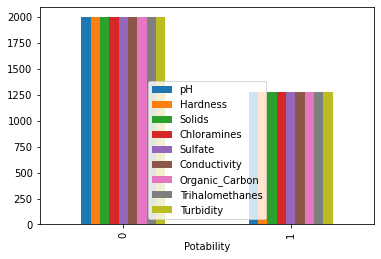

In [7]:
class_balance = data.groupby('Potability').count()
class_balance.plot(kind='bar')

Based on the counts for each class label, there are a significant number more non-potable records than potable records. To address this issue, we will use SMOTE to create more potable records (this is implemented in the Pipeline for the models).

Next, we should check the columns for any outliers. We will focus primarily on pH, Sulfate, and Trihalomethanes; however, there should also be a correlation between Hardness and Solids based off their definitions.

Next, 

array([[<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'Hardness'}>,
        <AxesSubplot:title={'center':'Solids'}>],
       [<AxesSubplot:title={'center':'Chloramines'}>,
        <AxesSubplot:title={'center':'Sulfate'}>,
        <AxesSubplot:title={'center':'Conductivity'}>],
       [<AxesSubplot:title={'center':'Organic_Carbon'}>,
        <AxesSubplot:title={'center':'Trihalomethanes'}>,
        <AxesSubplot:title={'center':'Turbidity'}>]], dtype=object)

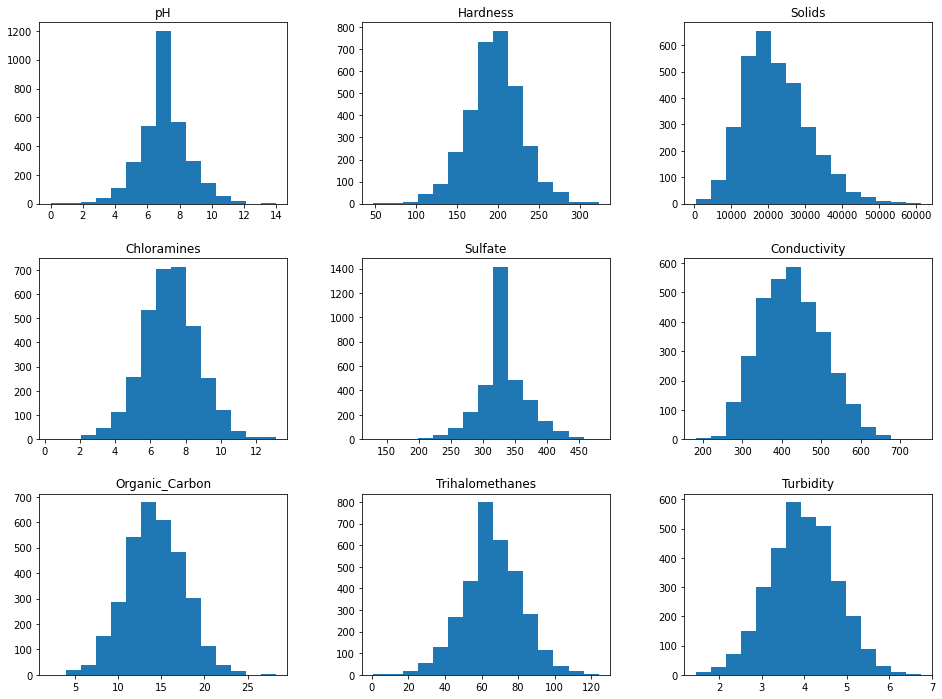

In [22]:
# Look at distribution of each feature
data.iloc[:, :-1].hist(grid=False, bins=15, figsize=(16, 12))

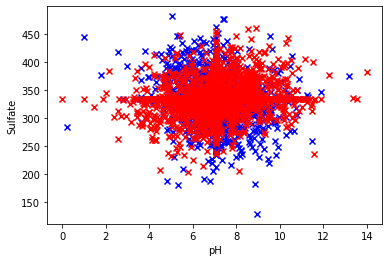

In [10]:
# Look at relationship between ph and Sulfate
potable_water = data[data['Potability'] == 1]
non_potable_water = data[data['Potability'] == 0]

plt.scatter(potable_water['pH'], potable_water['Sulfate'], c='blue', marker='x')
plt.scatter(non_potable_water['pH'], non_potable_water['Sulfate'], c='red', marker='x')

plt.xlabel('pH')
plt.ylabel('Sulfate')
plt.show()

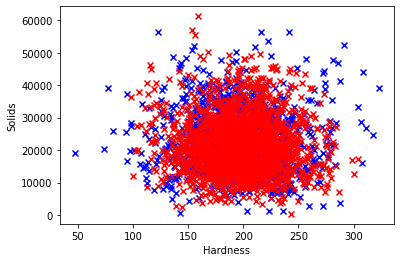

'TODO need '

In [11]:
# Clean plt and plot Hardness and Solids
plt.clf()

plt.scatter(potable_water['Hardness'], potable_water['Solids'], c='blue', marker='x')
plt.scatter(non_potable_water['Hardness'], non_potable_water['Solids'], c='red', marker='x')

plt.xlabel('Hardness')
plt.ylabel('Solids')
plt.show()

Based off the histograms, the data appears to be well balanced with bell curve distributions. The scatter plot did not reveal a correlation between Hardness and Solids, which indicates the attributes are independent of each other.

# Feature Engineering

In [12]:
"""
BINNING make additional ph where it classifies as acid (0-7) neutral(7-8) or base(8-14)

ONE HOT ENCODING AND BINNING
WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards

Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water

According to WHO standards, EC value should not exceeded 400 μS/cm

THM levels up to 80 ppm is considered safe in drinking water

The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU
"""



'\nBINNING make additional ph where it classifies as acid (0-7) neutral(7-8) or base(8-14)\n\nONE HOT ENCODING AND BINNING\nWHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards\n\nDesirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.\n\nChlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water\n\nAccording to WHO standards, EC value should not exceeded 400 μS/cm\n\nTHM levels up to 80 ppm is considered safe in drinking water\n\nThe mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU\n'

# Training a Model

Because the data appears to be evenly distributed and no correlation clearly exists between an attribute and its label, nor between two attributes, there must be relationships in higher dimensions. 

## Order of Training

We will begin by training a *KNN Classifier* because it takes every dimension into account. 

Then, we will train a *Naive Bayes Classifier* because Potable Water may be more likely to occur with certain values.

Then, we will train a *Neural Net Classifier* to find unobivous patterns in the data.

Lastly, we will use an *ADABoostClassifier* to focus on the hard-to-classify records.

## KNN Classifier

In [13]:
# Import relevant packages
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import GridSearchCV

# Separate labels from features
labels = data['Potability']
features = data.loc[:, data.columns != 'Potability']

# We want to tune the number of neighbors 
param_grid = {
    'knn__n_neighbors': list(range(1, 51))
}

# We will need to scale the data
scaler = StandardScaler()
knn = KNeighborsClassifier(n_neighbors=7)

# Create pipeline
pipeline = imbpipeline(steps = [['smote', SMOTE()],['scalar', scaler],['knn', knn]])

# Run 5-fold cross validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Run 5-fold nested cross validation
nested_score = cross_val_score(grid_search, features, labels, cv=5)

# Get best K and accuracy
print('Accuracy:', nested_score.mean())

KeyboardInterrupt: 

## Naive Bayes Classifier

In [ ]:
# Import Relevant Packages
from sklearn.naive_bayes import GaussianNB

# Create the classifier
nb = GaussianNB()

# Create an imbpipeline to address class imbalance
pipeline = imbpipeline(steps = [['smote', SMOTE()], ['nb', nb]])

# Run 10-fold cross validation
scores = cross_val_score(pipeline, features, labels, cv=10)

print('Accuracy:', scores.mean())

## Neural Net Classifier

In [ ]:
# Import relevant packages
from sklearn.neural_network import MLPClassifier

# Initialize NN
mlp = MLPClassifier()

# We want to tune the number of layers and 
# activation function
param_grid = {
    'mlp__hidden_layer_sizes': [(30,), (40,), (50,), (60,)],
    'mlp__activation': ['logistic', 'tanh', 'relu']
}

# Create an imbpipeline to address class imbalance, scale
pipeline = imbpipeline(steps = [['smote', SMOTE()], ['scalar', scaler], ['mlp', mlp]])

# Run 5-fold cross validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Run 3-fold nested cross validation
nested_score = cross_val_score(grid_search, features, labels, cv=3)

print('Accuracy:', nested_score.mean())

## Ensemble Classifier

In [ ]:
# Import relevant packages
from sklearn.ensemble import AdaBoostClassifier

# We want to tune the number of estimators
param_grid = {
    'ada__n_estimators': [50, 100, 150, 200]
}

# Initialize ADA Boost Classifier
ada = AdaBoostClassifier(n_estimators=150)

# Create an imbpipeline to address class imbalance
pipeline = imbpipeline(steps = [['smote', SMOTE()], ['ada', ada]])

# Run 5-fold cross validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Run 5-fold cross validation
nested_score = cross_val_score(grid_search, features, labels, cv=5)

print("Accuracy:", nested_score.mean())

# The Final Model

Based on the results of testing a few different models, a *KNN Classifier* would work best to classify this dataset.

Surprisingly, there is little correlation between different attributes and between the attribrutes and the labels.

In [ ]:
### Adapted from https://stackoverflow.com/questions/39409866/correlation-heatmap ###
import seaborn as sns

# calculate the correlation matrix
corr = data.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)